![](images/20_00.png)

In [1]:
x = floor(runif(100, min = 1, max = 101))
y = floor(runif(100, min = 1, max = 101))

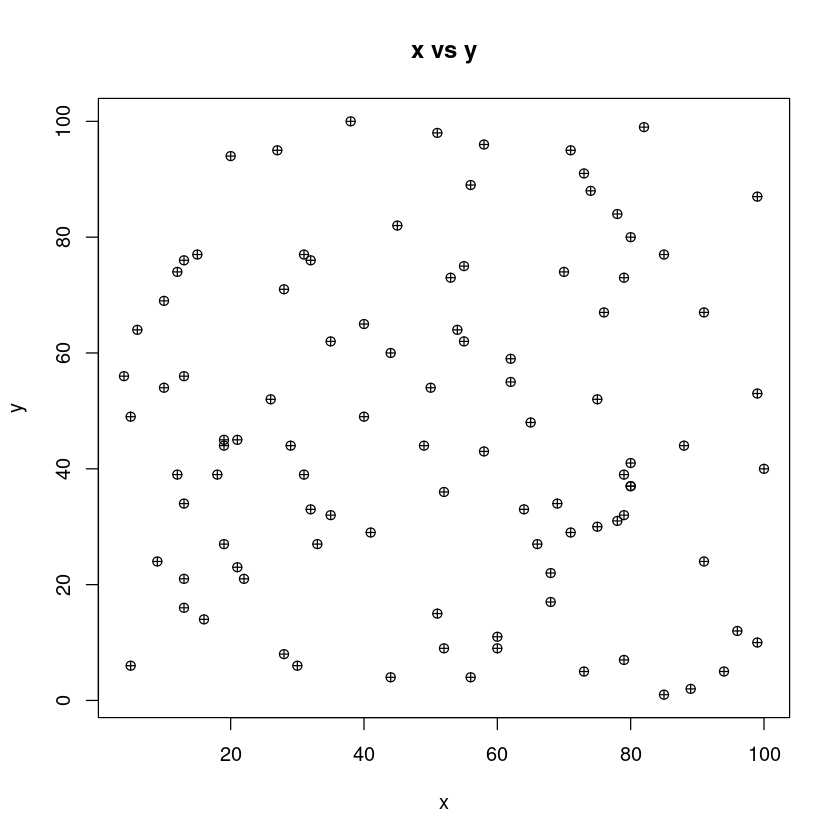

In [2]:
plot(x = x, y = y, xlab = "x", ylab = "y",
     main = "x vs y", pch = 10)

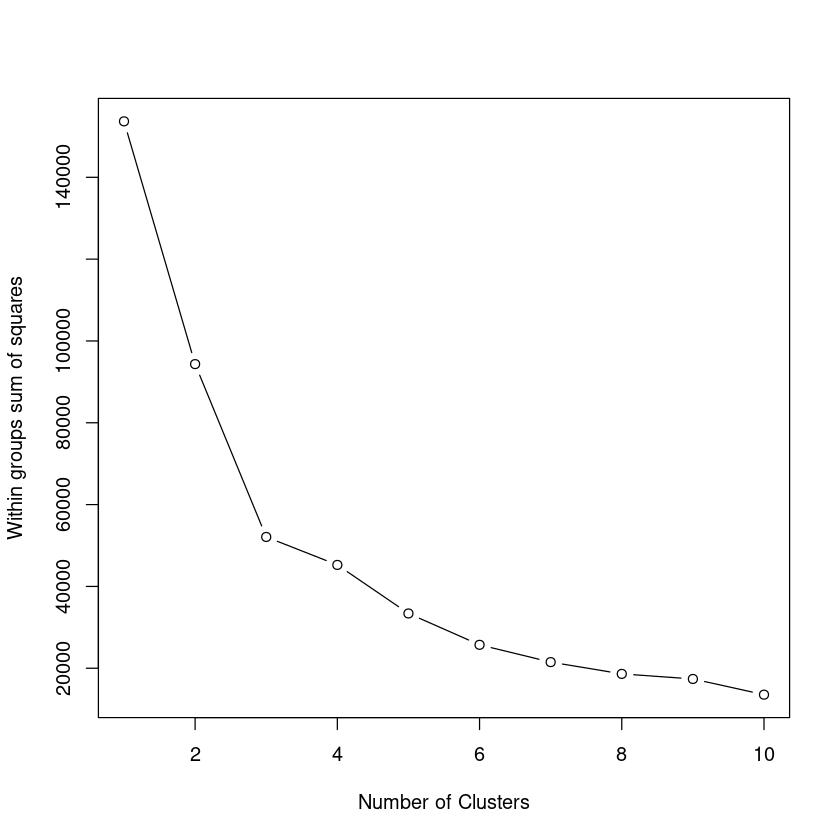

In [4]:
mydata = data.frame(x = x, y = y)
wss = (nrow(mydata) - 1)*sum(apply(mydata, 2, var))

for (i in 1:10) {
    wss[i] = sum(kmeans(mydata, centers = i)$withinss)
}

plot(1:10, wss, type = 'b',
     xlab = 'Number of Clusters',
     ylab = "Within groups sum of squares")

In [6]:
set.seed(20)
dataCluster = kmeans(mydata, centers = 4, nstart = 20)

dataCluster

K-means clustering with 4 clusters of sizes 31, 24, 26, 19

Cluster means:
         x        y
1 74.35484 23.67742
2 70.33333 75.50000
3 23.73077 29.30769
4 23.63158 71.57895

Clustering vector:
  [1] 2 4 1 2 3 3 4 3 4 2 1 2 1 3 3 2 3 1 2 1 2 2 1 1 1 3 4 4 4 3 2 1 3 4 4 2 3
 [38] 1 2 1 3 1 3 2 1 1 1 3 2 3 1 1 1 1 1 1 1 3 1 1 1 2 1 2 3 4 1 4 1 3 2 3 1 2
 [75] 4 3 1 1 4 3 2 4 2 4 3 2 3 2 4 2 2 3 3 2 4 3 4 4 4 3

Within cluster sum of squares by cluster:
[1] 12499.871 10397.333  8660.654  6735.053
 (between_SS / total_SS =  75.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [7]:
dataCluster$centers

,x,y
1,74.35484,23.67742
2,70.33333,75.50000
3,23.73077,29.30769
4,23.63158,71.57895


In [8]:
x = c(80, 50, 70)
y = c(30, 45, 75)
data_new = data.frame(x = x, y = y)

cluster = function(x, centers) {
    tmp = sapply(seq_len(nrow(x)),
                function(i) apply(centers, 1,
                                 function(v) sum((x[i,] - v)^2)))

    max.col(-t(tmp))
}
                                  
new = cluster(data_new, dataCluster[['centers']])
                                  
new

[1] 1 3 2

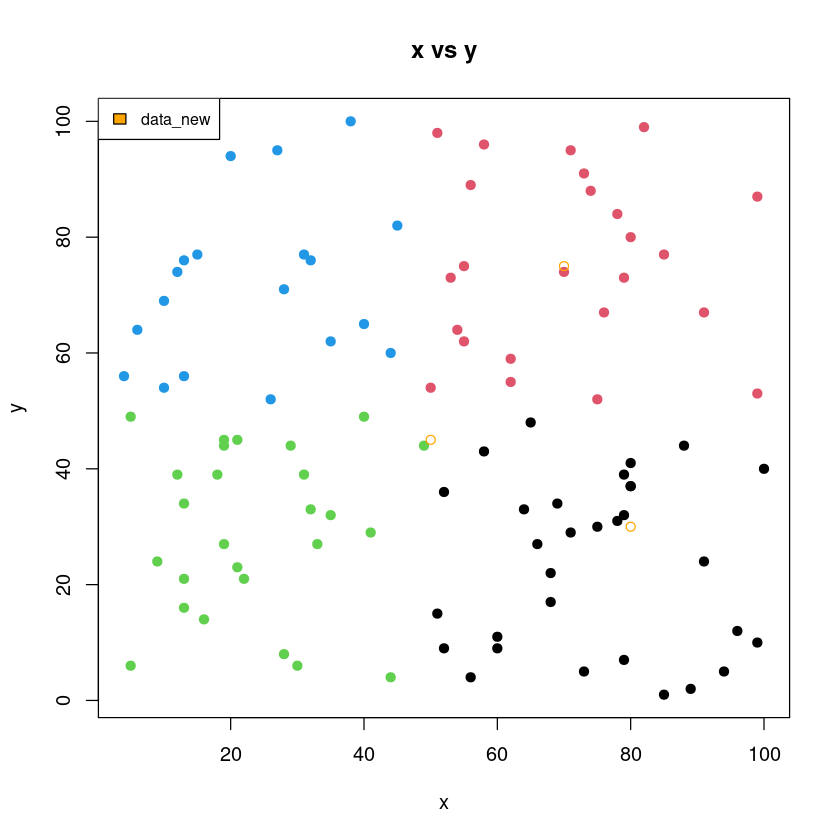

In [9]:
dataCluster$cluster = as.factor(dataCluster$cluster)

plot(x = mydata$x, y = mydata$y,
     xlab = "x", ylab = "y", main = "x vs y",
     col = dataCluster$cluster, pch = 19)

lines(x, y, col = 'orange', type = 'p')
legend("topleft", c('data_new'), cex = 0.8, fill = c('orange'))

In [10]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



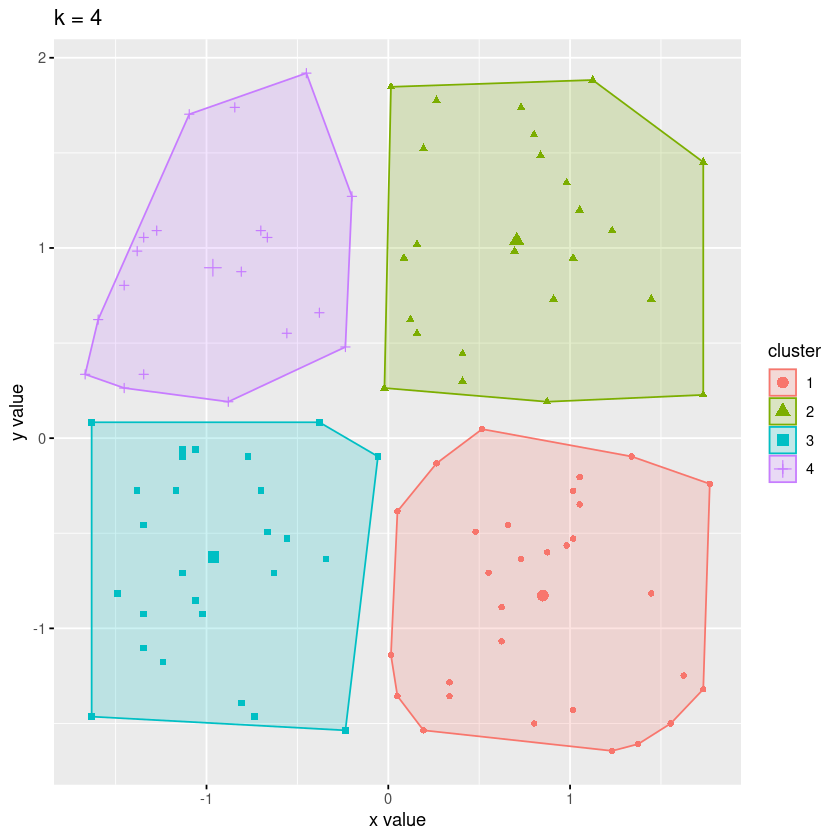

In [11]:
fviz_cluster(dataCluster, geom = "point", data = mydata) +
            ggtitle("k = 4")